In [33]:
# importing all necessary modules

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import nltk

In [34]:
warnings.filterwarnings(action = 'ignore')

In [35]:
import gensim
from gensim.models import Word2Vec

In [36]:
# Read 'alice.txt' file

sample = open("C:\\Users\\Arvind\\Desktop\\alice30.txt", "r")
s = sample.read()

In [37]:
# Replaces escape character with space

f = s.replace("\n", " ")

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arvind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
data = []

# iterate through each sentence in the file 

for i in sent_tokenize(f):
    temp = []
    
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
        
    data.append(temp)
    
# Create CBOW model

model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5)

In [40]:
# Print results

print("Cosine similarity between 'alice' " + 
               "and 'wonderland' - CBOW : ", 
    model1.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ", 
      model1.similarity('alice', 'machines')) 


Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.998638
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9978037


In [41]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 

In [42]:
# Print results 
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ", 
    model2.similarity('alice', 'wonderland')) 
      
print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ", 
      model2.similarity('alice', 'machines')) 

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.95736885
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.9554591


In [43]:
words = list(model1.wv.vocab)
print(words[0:10])

['***this', 'is', 'the', 'project', 'gutenberg', 'etext', 'of', 'alice', 'in', 'wonderland***']


In [44]:
print(model1['wonderland***'])

[ 0.02717469 -0.01624847  0.00358747 -0.00575946  0.00030224 -0.00761102
 -0.02365566 -0.01449826  0.01564334  0.00326585 -0.00874309  0.01125954
  0.01623673 -0.04330374 -0.02383975  0.00890724 -0.0086201   0.00323394
 -0.0051082   0.00749928  0.00104897  0.02682389 -0.00102233  0.0079655
 -0.00065431  0.01936607  0.02091298  0.01158835  0.01269811  0.00845757
 -0.03445278  0.05887381  0.01132316 -0.0025293  -0.03182786 -0.01103409
  0.0190793  -0.00020022 -0.01356932 -0.02269059 -0.01852935  0.00738969
 -0.01956922  0.00471229 -0.00158229 -0.00105445 -0.02101792  0.02893771
 -0.01453405  0.04075827 -0.03276684  0.01780194  0.01527521 -0.00452492
 -0.01189724 -0.02147836 -0.00826416 -0.03867442  0.00514184  0.00382111
  0.03171313  0.02043673  0.00972551 -0.00259764  0.02696482  0.00224022
 -0.01709377 -0.00424877  0.00523567  0.05359568  0.00098392  0.00047634
  0.0067577  -0.00462544  0.00149091  0.00726953  0.01848237  0.00755582
  0.00932385  0.01727648  0.00109697 -0.01530508  0.

In [45]:
words = list(model2.wv.vocab)
print(words[0:10])

['***this', 'is', 'the', 'project', 'gutenberg', 'etext', 'of', 'alice', 'in', 'wonderland***']


In [46]:
print(model2['wonderland***'])

[ 0.05667176 -0.0397201  -0.00053827  0.0033699   0.01316905 -0.02251842
 -0.02057339 -0.02513118  0.02198779  0.00182719 -0.00308038  0.00298265
  0.02522977 -0.08456436 -0.05540946 -0.01710126 -0.01734093  0.0039059
  0.01245259  0.01317843  0.00508568  0.0758611   0.00500098  0.02146958
 -0.00345142  0.04426491  0.03180435  0.0199993   0.02578422  0.00930774
 -0.07289771  0.12026251  0.04676103 -0.00503772 -0.07911605 -0.01547505
  0.03486902 -0.01170052 -0.02852888 -0.07312432 -0.02843012  0.01068878
 -0.02462989  0.01481347 -0.02048942 -0.01233414 -0.0180239   0.04767447
 -0.02731765  0.07923803 -0.07024764  0.06782443  0.0671535  -0.00041867
 -0.01692612 -0.04069819 -0.01744447 -0.08792962  0.0027922   0.01097574
  0.05497279  0.04015181  0.02109452  0.01051048  0.07465627  0.0229154
 -0.04190053 -0.02880585  0.01466776  0.09511515  0.02820182 -0.00197488
  0.03307755 -0.00801056  0.01223116  0.00783878  0.0410522   0.01913
  0.03649379  0.01076814 -0.0241701  -0.02132695  0.0243

In [54]:
model1.save('model1.bin')

In [48]:
model2.wv.save_word2vec_format('model2.txt', binary=False)

In [55]:
model = Word2Vec.load('model1.bin')
                      
                      

In [53]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.0685661e-03 -2.5875759e-03  1.1125389e-03  1.9749235e-03
 -1.0140912e-03 -4.1073151e-03 -3.1426819e-03 -1.8090190e-03
  1.3021664e-03 -4.9697021e-03  1.9112788e-03 -3.5961179e-04
  2.3602371e-03 -1.5971969e-03  2.3425969e-03  3.3488462e-03
 -2.4917701e-03  4.9579521e-03 -1.5990823e-03 -2.6302598e-03
 -2.1149823e-03  1.9541292e-03  3.0287803e-04 -4.8904908e-03
 -3.3760509e-03  2.3673262e-04  3.8298545e-03 -1.5828956e-03
  2.9020372e-03  1.3010803e-03 -4.2607244e-03 -2.3876084e-03
 -3.5132710e-03  4.7998703e-03  9.7780756e-04  1.1100944e-03
  3.6290321e-03  2.3318469e-03 -1.5314535e-03  3.1459059e-03
 -4.9080704e-03 -4.5154127e-04  1.4698782e-03 -2.7951167e-03
 -2.9191694e-03  3.9516245e-03 -4.6680165e-03  3.9982889e-03
  3.8200633e-03 -3.0643705e-03  4.1127955e-03 -4.9069792e-04
 -1.1097749e-03  2.5203140e-03  3.2563105e-0

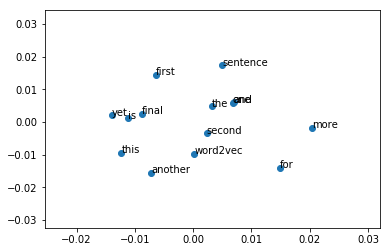

In [57]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()